In [1]:
# Initial Python environment setup...
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to

In [2]:
from haversine import haversine
# packages for mapping


In [3]:
train_df =  pd.read_csv('train.csv', nrows = 10_000_00)
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [4]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
%matplotlib inline

In [6]:
train_df['pickup_datetime']= pd.to_datetime(train_df['pickup_datetime'])


In [18]:
train_df['pickup_day_of_week']=train_df['pickup_datetime'].dt.dayofweek

In [19]:
train_df['pickup_month']=train_df['pickup_datetime'].dt.month

In [20]:
train_df.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_date,pickup_day_of_week
999995,2014-09-13 21:44:38.0000001,7.0,2014-09-13 21:44:38,-73.976676,40.785630,-73.959196,40.775114,1,9,2014-09-13,5
999996,2010-09-20 14:50:37.0000002,7.3,2010-09-20 14:50:37,-73.992103,40.671385,-73.992103,40.671385,2,9,2010-09-20,0
999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00,-73.978423,40.751135,-73.993397,40.762197,5,4,2013-04-26,4
999998,2011-07-08 00:29:00.00000099,6.9,2011-07-08 00:29:00,-73.980317,40.759482,-73.976832,40.743122,1,7,2011-07-08,4
999999,2009-12-31 14:30:00.00000021,4.1,2009-12-31 14:30:00,-74.006635,40.741598,-73.999450,40.745702,1,12,2009-12-31,3


In [21]:
train_df['pickup_date']=train_df['pickup_datetime'].dt.date

In [22]:
train_df['key'].unique()


array(['2009-06-15 17:26:21.0000001', '2010-01-05 16:52:16.0000002',
       '2011-08-18 00:35:00.00000049', ...,
       '2013-04-26 14:03:00.000000118', '2011-07-08 00:29:00.00000099',
       '2009-12-31 14:30:00.00000021'], dtype=object)

In [23]:
train_df.loc[train_df["pickup_date"] == "2009-12-31"]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_date,pickup_day_of_week


In [24]:
train_df.loc[train_df["key"] == "756707"]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_date,pickup_day_of_week


In [25]:
train_df.dtypes

key                           object
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
pickup_month                   int64
pickup_date                   object
pickup_day_of_week             int64
dtype: object

In [26]:
train_df['pickup_date'] =train_df['pickup_date'].astype(str)


In [27]:
train_df.dtypes

key                           object
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
pickup_month                   int64
pickup_date                   object
pickup_day_of_week             int64
dtype: object

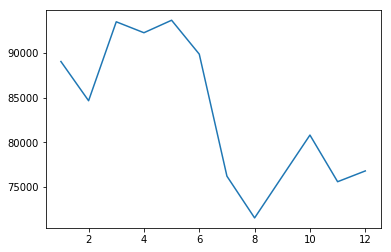

In [28]:
train_df["pickup_month"].value_counts().sort_index().plot()

In [29]:
train_df.sort_values('pickup_day_of_week', ascending = True, inplace= True)

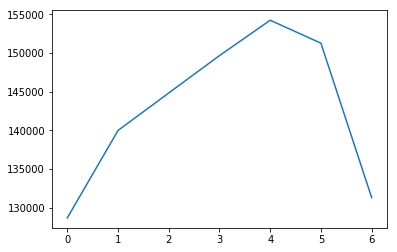

In [30]:
train_df["pickup_day_of_week"].value_counts().sort_index().plot()

In [31]:
train_df['pickup_hour']=train_df['pickup_datetime'].dt.hour

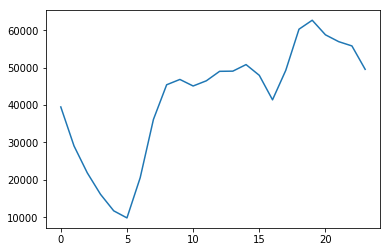

In [32]:
train_df['pickup_hour'].value_counts().sort_index().plot()

In [33]:
train_df['pickup_year']=train_df['pickup_datetime'].dt.year

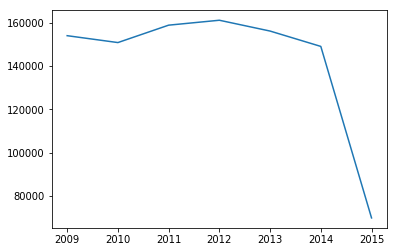

In [34]:
train_df['pickup_year'].value_counts().sort_index().plot()

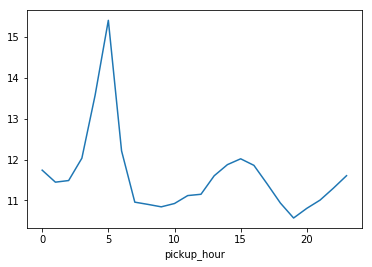

In [35]:
train_df.groupby('pickup_hour')['fare_amount'].mean().plot()

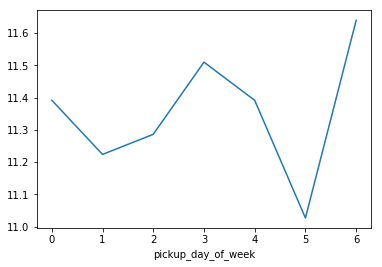

In [36]:
train_df.groupby('pickup_day_of_week')['fare_amount'].mean().plot()

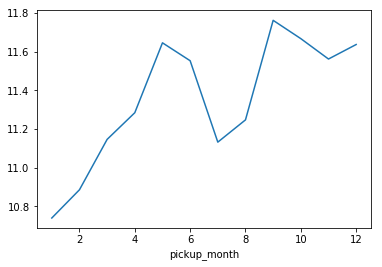

In [37]:
train_df.groupby('pickup_month')['fare_amount'].mean().plot()

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 305517
Data columns (total 13 columns):
key                   1000000 non-null object
fare_amount           1000000 non-null float64
pickup_datetime       1000000 non-null datetime64[ns]
pickup_longitude      1000000 non-null float64
pickup_latitude       1000000 non-null float64
dropoff_longitude     999990 non-null float64
dropoff_latitude      999990 non-null float64
passenger_count       1000000 non-null int64
pickup_month          1000000 non-null int64
pickup_date           1000000 non-null object
pickup_day_of_week    1000000 non-null int64
pickup_hour           1000000 non-null int64
pickup_year           1000000 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(5), object(2)
memory usage: 106.8+ MB


In [39]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_day_of_week,pickup_hour,pickup_year
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924,6.267875,3.039856,13.509477,2011.741106
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911,3.436243,1.949970,6.513840,1.860754
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000,1.000000,0.000000,0.000000,2009.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000,3.000000,1.000000,9.000000,2010.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000,6.000000,3.000000,14.000000,2012.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000,9.000000,5.000000,19.000000,2013.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000,12.000000,6.000000,23.000000,2015.000000


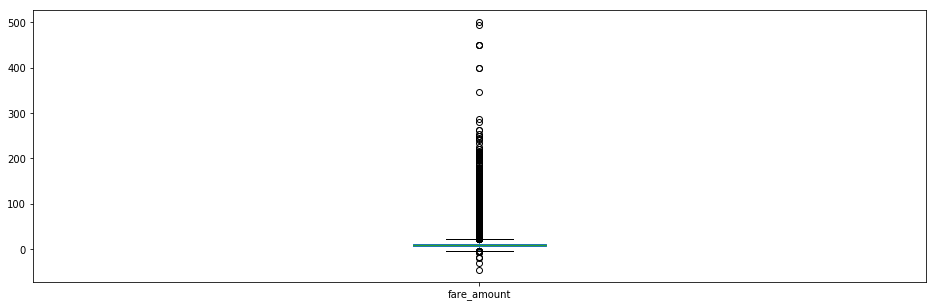

In [40]:
train_df["fare_amount"].plot.box(figsize=(16,5))  

In [41]:
train_df['id'] = train_df.index

In [42]:
new =train_df.groupby(pd.Grouper(key='pickup_datetime', freq='15T')).apply(lambda x: x['id'])

In [43]:
train_df['id'] = train_df.index

In [44]:
new

pickup_datetime            
2009-01-01 00:00:00  880228    880228
                     661006    661006
                     756707    756707
                     745620    745620
2009-01-01 00:15:00  964259    964259
                     915988    915988
2009-01-01 00:30:00  297860    297860
                     124750    124750
                     876677    876677
                     82469      82469
2009-01-01 00:45:00  124445    124445
                     973236    973236
                     965480    965480
2009-01-01 01:00:00  760438    760438
                     894290    894290
                     766885    766885
2009-01-01 01:15:00  945037    945037
                     76195      76195
                     102243    102243
                     773755    773755
                     542263    542263
2009-01-01 01:30:00  12739      12739
2009-01-01 01:45:00  709206    709206
                     307980    307980
                     674362    674362
2009-01-01 02:00:00  1

In [45]:
pd.Grouper(key='pickup_datetime', freq='15m')

TimeGrouper(key='pickup_datetime', freq=<15 * MonthEnds>, axis=0, sort=True, closed='right', label='right', how='mean', convention='e', base=0)

In [46]:
new.index.get_level_values('pickup_datetime')

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 00:00:00',
               '2009-01-01 00:00:00', '2009-01-01 00:00:00',
               '2009-01-01 00:15:00', '2009-01-01 00:15:00',
               '2009-01-01 00:30:00', '2009-01-01 00:30:00',
               '2009-01-01 00:30:00', '2009-01-01 00:30:00',
               ...
               '2015-06-30 23:15:00', '2015-06-30 23:30:00',
               '2015-06-30 23:30:00', '2015-06-30 23:30:00',
               '2015-06-30 23:30:00', '2015-06-30 23:30:00',
               '2015-06-30 23:45:00', '2015-06-30 23:45:00',
               '2015-06-30 23:45:00', '2015-06-30 23:45:00'],
              dtype='datetime64[ns]', name='pickup_datetime', length=1000000, freq='15T')

In [47]:
train_df.loc[train_df["key"] == '799435' ]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_date,pickup_day_of_week,pickup_hour,pickup_year,id


In [48]:
train_df.dtypes

key                           object
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
pickup_month                   int64
pickup_date                   object
pickup_day_of_week             int64
pickup_hour                    int64
pickup_year                    int64
id                             int64
dtype: object

In [49]:
interval_df=pd.DataFrame({'interval':new.index.get_level_values(0), 'id':new.index.get_level_values(1)})

In [50]:
new.index.get_level_values(1)

Int64Index([880228, 661006, 756707, 745620, 964259, 915988, 297860, 124750,
            876677,  82469,
            ...
            182743, 506007, 751978, 240182, 323864, 286276, 955575, 915826,
            751350, 785182],
           dtype='int64', length=1000000)

In [51]:
interval_df.dtypes

interval    datetime64[ns]
id                   int64
dtype: object

In [52]:
interval_df.tail()

,interval,id
999995,2015-06-30 23:30:00,286276
999996,2015-06-30 23:45:00,955575
999997,2015-06-30 23:45:00,915826
999998,2015-06-30 23:45:00,751350
999999,2015-06-30 23:45:00,785182


In [53]:
train_df.loc[train_df["id"] == 751350]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_date,pickup_day_of_week,pickup_hour,pickup_year,id
751350,2015-06-30 23:53:23.0000002,3.5,2015-06-30 23:53:23,-73.97802,40.757439,-73.980705,40.753544,1,6,2015-06-30,1,23,2015,751350


In [54]:
train_df=pd.merge(train_df, interval_df, left_on = 'id', right_on = 'id', how = 'inner')

In [55]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_date,pickup_day_of_week,pickup_hour,pickup_year,id,interval
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,6,2009-06-15,0,17,2009,0,2009-06-15 17:15:00
1,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-73.992147,40.762532,-73.984915,40.768142,5,8,2009-08-03,0,23,2009,410475,2009-08-03 23:00:00
2,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-73.993900,40.750800,-74.014800,40.718000,1,7,2011-07-11,0,13,2011,410487,2011-07-11 13:00:00
3,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-73.979827,40.766015,-73.962497,40.677382,3,12,2012-12-17,0,22,2012,410491,2012-12-17 22:45:00
4,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-73.995742,40.726778,-73.978080,40.721325,1,2,2011-02-28,0,22,2011,410493,2011-02-28 22:00:00


In [56]:
train_df['interval_time']=train_df['interval'].dt.time

In [57]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_date,pickup_day_of_week,pickup_hour,pickup_year,id,interval,interval_time
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,6,2009-06-15,0,17,2009,0,2009-06-15 17:15:00,17:15:00
1,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-73.992147,40.762532,-73.984915,40.768142,5,8,2009-08-03,0,23,2009,410475,2009-08-03 23:00:00,23:00:00
2,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-73.993900,40.750800,-74.014800,40.718000,1,7,2011-07-11,0,13,2011,410487,2011-07-11 13:00:00,13:00:00
3,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-73.979827,40.766015,-73.962497,40.677382,3,12,2012-12-17,0,22,2012,410491,2012-12-17 22:45:00,22:45:00
4,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-73.995742,40.726778,-73.978080,40.721325,1,2,2011-02-28,0,22,2011,410493,2011-02-28 22:00:00,22:00:00


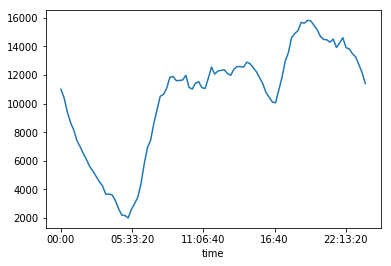

In [58]:
train_df['interval_time'].value_counts().sort_index().plot()

In [59]:
train_df["pickup_longitude"] = train_df['pickup_longitude'].apply(lambda x:round(x,2))


In [60]:
train_df["pickup_latitude"] = train_df['pickup_latitude'].apply(lambda x:round(x,2))


In [61]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_date,pickup_day_of_week,pickup_hour,pickup_year,id,interval,interval_time
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.84,40.72,-73.841610,40.712278,1,6,2009-06-15,0,17,2009,0,2009-06-15 17:15:00,17:15:00
1,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-73.99,40.76,-73.984915,40.768142,5,8,2009-08-03,0,23,2009,410475,2009-08-03 23:00:00,23:00:00
2,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-73.99,40.75,-74.014800,40.718000,1,7,2011-07-11,0,13,2011,410487,2011-07-11 13:00:00,13:00:00
3,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-73.98,40.77,-73.962497,40.677382,3,12,2012-12-17,0,22,2012,410491,2012-12-17 22:45:00,22:45:00
4,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-74.00,40.73,-73.978080,40.721325,1,2,2011-02-28,0,22,2011,410493,2011-02-28 22:00:00,22:00:00


In [62]:
train_df['demand']=train_df.groupby(['interval','pickup_longitude','pickup_latitude'])['interval'].transform('count')

In [63]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_date,pickup_day_of_week,pickup_hour,pickup_year,id,interval,interval_time,demand
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.84,40.72,-73.841610,40.712278,1,6,2009-06-15,0,17,2009,0,2009-06-15 17:15:00,17:15:00,1
1,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-73.99,40.76,-73.984915,40.768142,5,8,2009-08-03,0,23,2009,410475,2009-08-03 23:00:00,23:00:00,1
2,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-73.99,40.75,-74.014800,40.718000,1,7,2011-07-11,0,13,2011,410487,2011-07-11 13:00:00,13:00:00,3
3,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-73.98,40.77,-73.962497,40.677382,3,12,2012-12-17,0,22,2012,410491,2012-12-17 22:45:00,22:45:00,1
4,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-74.00,40.73,-73.978080,40.721325,1,2,2011-02-28,0,22,2011,410493,2011-02-28 22:00:00,22:00:00,1


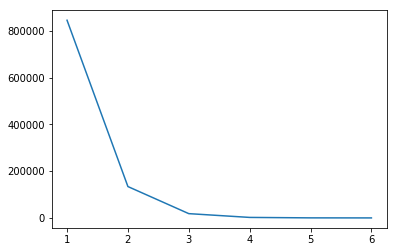

In [64]:
train_df['demand'].value_counts().sort_index().plot()

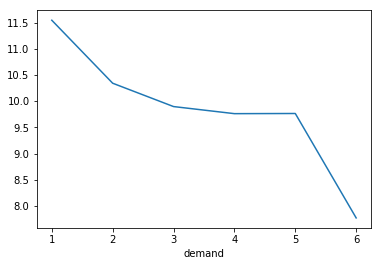

In [65]:
train_df.groupby('demand')['fare_amount'].mean().plot()

In [66]:
def distance(lat1, lon1, lat2, lon2):
    """
    calculates the Manhattan distance between 2 points using their coordinates   
    Returns
    -------
    d: float
        The Manhattan distance between the two points in kilometers
    """
    d = haversine((lat1, lon1), (lat2, lon1)) + haversine((lat2, lon1), (lat2, lon2))
    return d

# The distance is calculated in kilometers
train_df["distance"] = train_df.apply(lambda row: distance(row["pickup_latitude"], 
                                               row["pickup_longitude"], 
                                               row["dropoff_latitude"], 
                                               row["dropoff_longitude"]), axis=1)

In [67]:
train_df["distance"]

0          0.994348
1          1.333581
2          5.648338
3         11.774684
4          2.811899
5          2.236873
6          1.916328
7          2.848470
8          5.543908
9          0.307994
10         1.779232
11         9.505639
12         1.700778
13         2.724473
14         3.071089
15        21.839867
16         2.755513
17         4.304596
18         0.542047
19         0.701315
20         1.481350
21         3.030238
22         6.008949
23         2.902709
24         9.485814
25         0.582736
26         1.227529
27         4.691100
28         4.743672
29         0.000000
            ...    
999970     8.208024
999971     5.758488
999972     5.287813
999973     1.778609
999974     0.823994
999975     3.533078
999976     1.085037
999977    34.915028
999978     7.348836
999979     0.982604
999980    23.386542
999981     8.747947
999982     1.553576
999983     1.728682
999984     2.445260
999985     1.607214
999986     3.056351
999987    15.560204
999988     7.503730


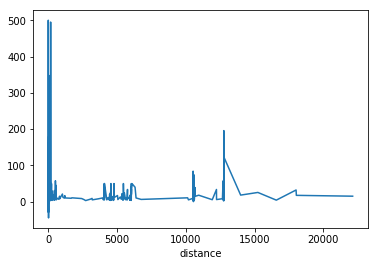

In [68]:
train_df.groupby('distance')['fare_amount'].mean().plot()

In [69]:
train_df["fare_amount"].

SyntaxError: invalid syntax (<ipython-input-69-dbfb18408d70>, line 1)

In [ ]:
train_df['distance'].max()

In [ ]:
train_df.to_csv("train_formatted.csv")

In [71]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,1000000.0,11.348079,9.822090,-44.900000,6.000000,8.500000,12.500000,500.000000
pickup_longitude,1000000.0,-72.526588,12.057929,-3377.680000,-73.990000,-73.980000,-73.970000,2522.270000
pickup_latitude,1000000.0,39.928901,7.626147,-3116.290000,40.730000,40.750000,40.770000,2621.630000
dropoff_longitude,999990.0,-72.527860,11.324494,-3383.296608,-73.991385,-73.980135,-73.963654,45.581619
dropoff_latitude,999990.0,39.919954,8.201418,-3114.338567,40.734046,40.753166,40.768129,1651.553433
passenger_count,1000000.0,1.684924,1.323911,0.000000,1.000000,1.000000,2.000000,208.000000
pickup_month,1000000.0,6.267875,3.436243,1.000000,3.000000,6.000000,9.000000,12.000000
pickup_day_of_week,1000000.0,3.039856,1.949970,0.000000,1.000000,3.000000,5.000000,6.000000
pickup_hour,1000000.0,13.509477,6.513840,0.000000,9.000000,14.000000,19.000000,23.000000
pickup_year,1000000.0,2011.741106,1.860754,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


In [72]:
train_df["interval"]

0        2009-06-15 17:15:00
1        2009-08-03 23:00:00
2        2011-07-11 13:00:00
3        2012-12-17 22:45:00
4        2011-02-28 22:00:00
5        2010-03-29 13:00:00
6        2012-03-26 02:00:00
7        2011-04-18 14:00:00
8        2012-07-02 22:30:00
9        2012-10-01 00:15:00
10       2009-09-21 20:45:00
11       2012-06-18 21:45:00
12       2009-06-15 14:45:00
13       2013-05-06 07:30:00
14       2010-01-11 17:00:00
15       2013-06-17 16:15:00
16       2012-03-26 17:15:00
17       2009-05-04 15:30:00
18       2015-02-02 10:30:00
19       2015-06-15 15:30:00
20       2011-02-07 09:15:00
21       2012-09-10 22:30:00
22       2014-10-27 17:15:00
23       2009-03-16 10:15:00
24       2009-08-31 01:00:00
25       2013-02-11 09:00:00
26       2015-03-02 13:30:00
27       2012-04-02 22:00:00
28       2010-02-22 09:45:00
29       2009-12-28 20:15:00
                 ...        
999970   2014-02-09 20:45:00
999971   2014-05-11 16:15:00
999972   2014-06-01 12:15:00
999973   2013-

In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
key                   1000000 non-null object
fare_amount           1000000 non-null float64
pickup_datetime       1000000 non-null datetime64[ns]
pickup_longitude      1000000 non-null float64
pickup_latitude       1000000 non-null float64
dropoff_longitude     999990 non-null float64
dropoff_latitude      999990 non-null float64
passenger_count       1000000 non-null int64
pickup_month          1000000 non-null int64
pickup_date           1000000 non-null object
pickup_day_of_week    1000000 non-null int64
pickup_hour           1000000 non-null int64
pickup_year           1000000 non-null int64
id                    1000000 non-null int64
interval              1000000 non-null datetime64[ns]
interval_time         1000000 non-null object
demand                1000000 non-null int64
distance              999990 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(7),

In [492]:
train_df.to_csv("formatted.csv")

In [373]:
df = pd.read_csv('formatted.csv')

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
Unnamed: 0            1000000 non-null int64
key                   1000000 non-null object
fare_amount           1000000 non-null float64
pickup_datetime       1000000 non-null object
pickup_longitude      1000000 non-null float64
pickup_latitude       1000000 non-null float64
dropoff_longitude     999990 non-null float64
dropoff_latitude      999990 non-null float64
passenger_count       1000000 non-null int64
pickup_month          1000000 non-null int64
pickup_date           1000000 non-null object
pickup_day_of_week    1000000 non-null int64
pickup_hour           1000000 non-null int64
pickup_year           1000000 non-null int64
id                    1000000 non-null int64
interval              1000000 non-null object
interval_time         1000000 non-null object
demand                1000000 non-null int64
distance              999990 non-null float64
dtypes: float64(6),

In [375]:

df = df[["interval","fare_amount"]]

In [376]:
df.interval = pd.to_datetime(df.interval)

In [377]:
df.index = df.interval

In [378]:
df = df.resample(rule='60T', closed='left', label='left', base=17).mean()

In [379]:
df['id'] = range(1, len(df) + 1)

In [388]:
df.shape

(56929, 2)

In [380]:
df.head()

,fare_amount,id
interval,,
2008-12-31 23:17:00,11.666667,1
2009-01-01 00:17:00,9.666667,2
2009-01-01 01:17:00,8.800000,3
2009-01-01 02:17:00,12.811111,4
2009-01-01 03:17:00,8.470000,5


In [381]:
train_size = int(len(df) * 0.80)
train, test = df[0:train_size], df[train_size:len(df)]

In [382]:
train.head()

,fare_amount,id
interval,,
2008-12-31 23:17:00,11.666667,1
2009-01-01 00:17:00,9.666667,2
2009-01-01 01:17:00,8.800000,3
2009-01-01 02:17:00,12.811111,4
2009-01-01 03:17:00,8.470000,5


In [383]:
train.tail()

,fare_amount,id
interval,,
2014-03-13 09:17:00,10.479167,45539
2014-03-13 10:17:00,12.461818,45540
2014-03-13 11:17:00,10.300000,45541
2014-03-13 12:17:00,14.833000,45542
2014-03-13 13:17:00,21.054667,45543


In [385]:
test.tail()

,fare_amount,id
interval,,
2015-06-30 19:17:00,9.653846,56925
2015-06-30 20:17:00,12.375000,56926
2015-06-30 21:17:00,16.556842,56927
2015-06-30 22:17:00,14.522500,56928
2015-06-30 23:17:00,12.722222,56929


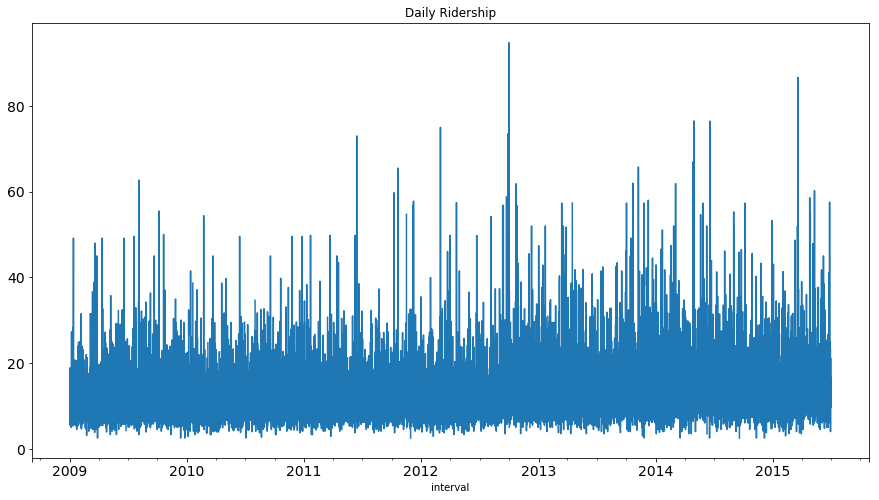

In [386]:
df.fare_amount.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)

In [389]:
test.tail()

,fare_amount,id
interval,,
2015-06-30 19:17:00,9.653846,56925
2015-06-30 20:17:00,12.375000,56926
2015-06-30 21:17:00,16.556842,56927
2015-06-30 22:17:00,14.522500,56928
2015-06-30 23:17:00,12.722222,56929


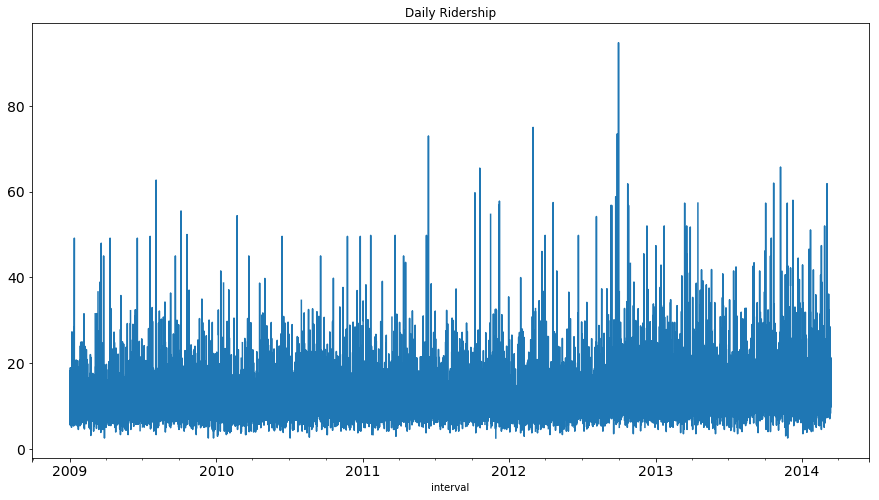

In [371]:
train.fare_amount.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)

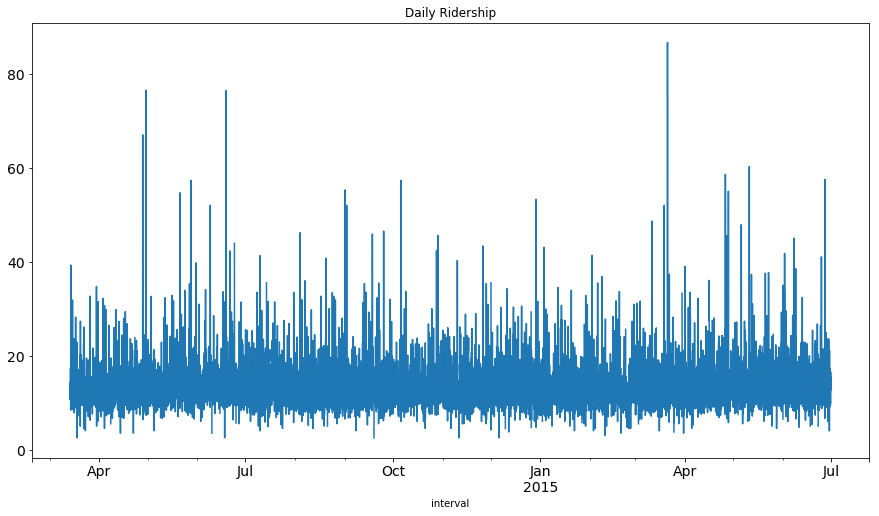

In [372]:
test.fare_amount.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)

In [391]:
df.head()

,fare_amount,id
interval,,
2008-12-31 23:17:00,11.666667,1
2009-01-01 00:17:00,9.666667,2
2009-01-01 01:17:00,8.800000,3
2009-01-01 02:17:00,12.811111,4
2009-01-01 03:17:00,8.470000,5


In [390]:
from sklearn.linear_model import LinearRegression

In [392]:
x_train = train.drop('fare_amount', axis=1)
x_test = test.drop('fare_amount', axis=1)
y_train = train[['fare_amount']]
y_test = test[['fare_amount']]

In [409]:
y_train= y_train.apply(np.int64)

In [413]:
y_test= y_test.apply(np.int64)

In [410]:
y_train.head()

,fare_amount
interval,
2008-12-31 23:17:00,11
2009-01-01 00:17:00,9
2009-01-01 01:17:00,8
2009-01-01 02:17:00,12
2009-01-01 03:17:00,8


In [416]:
y_test.head()

,fare_amount,RegOnTime
interval,,
2014-03-13 14:17:00,10,-4.515830e+16
2014-03-13 15:17:00,12,-4.515763e+16
2014-03-13 16:17:00,14,-4.515695e+16
2014-03-13 17:17:00,10,-4.515628e+16
2014-03-13 18:17:00,13,-4.515560e+16


In [420]:
y_hat_avg = test.copy()
y_hat_avg['t_fare_amount'] = train['fare_amount'].mean()

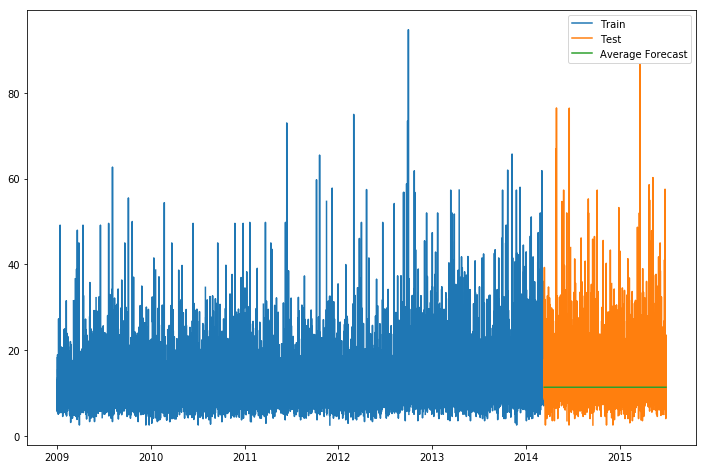

In [421]:
plt.figure(figsize=(12,8))
plt.plot(train['fare_amount'], label='Train')
plt.plot(test['fare_amount'], label='Test')
plt.plot(y_hat_avg['t_fare_amount'], label='Average Forecast')
plt.legend(loc='best')

In [422]:
df1 = df.copy()

In [423]:
df1['moving_avg_forecast'] = df['fare_amount'].rolling(60).mean()

In [439]:
y_hat_avg = test.copy()

In [433]:
train_size = int(len(df1) * 0.80)
train, test = df1[0:train_size], df1[train_size:len(df)]

In [436]:
test.head()

,fare_amount,id,moving_avg_forecast
interval,,,
2014-03-13 14:17:00,10.741500,45544,NaN
2014-03-13 15:17:00,12.135000,45545,NaN
2014-03-13 16:17:00,14.221905,45546,NaN
2014-03-13 17:17:00,10.644783,45547,NaN
2014-03-13 18:17:00,13.266571,45548,NaN


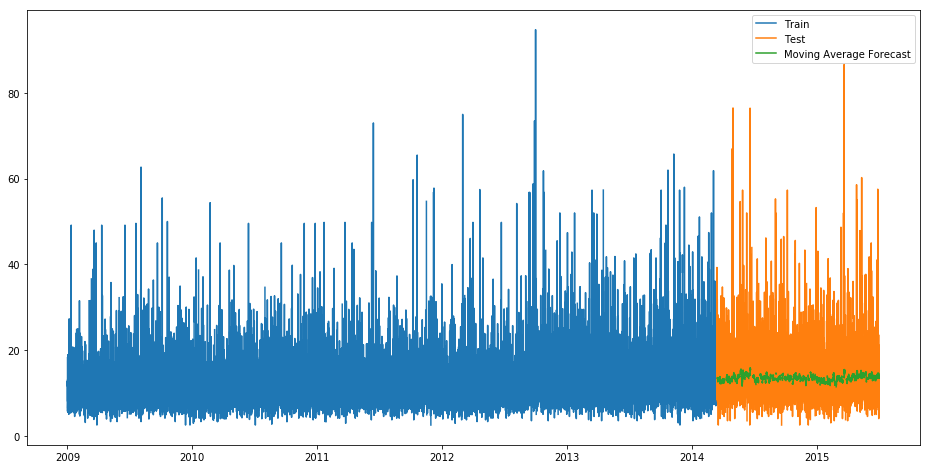

In [440]:
plt.figure(figsize=(16,8))
plt.plot(train['fare_amount'], label='Train')
plt.plot(test['fare_amount'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')

In [441]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [482]:
train['fare_amount'].isnull().sum()

299

In [481]:
train['fare_amount'].fillna(train['fare_amount'].mean())

interval
2008-12-31 23:17:00    11.666667
2009-01-01 00:17:00     9.666667
2009-01-01 01:17:00     8.800000
2009-01-01 02:17:00    12.811111
2009-01-01 03:17:00     8.470000
2009-01-01 04:17:00     8.711111
2009-01-01 05:17:00     8.166667
2009-01-01 06:17:00    11.318574
2009-01-01 07:17:00    18.200000
2009-01-01 08:17:00     5.700000
2009-01-01 09:17:00    16.300000
2009-01-01 10:17:00     9.328571
2009-01-01 11:17:00    11.700000
2009-01-01 12:17:00    10.520000
2009-01-01 13:17:00    10.344118
2009-01-01 14:17:00     7.490909
2009-01-01 15:17:00     7.646667
2009-01-01 16:17:00     7.866667
2009-01-01 17:17:00    13.138889
2009-01-01 18:17:00    11.758696
2009-01-01 19:17:00    11.025000
2009-01-01 20:17:00     6.427273
2009-01-01 21:17:00     8.390000
2009-01-01 22:17:00     8.035294
2009-01-01 23:17:00    12.406250
2009-01-02 00:17:00     7.450000
2009-01-02 01:17:00    12.266667
2009-01-02 02:17:00    11.200000
2009-01-02 03:17:00    11.318574
2009-01-02 04:17:00    10.700000
 

In [487]:
# create class
model = SimpleExpSmoothing(train['fare_amount'])

In [488]:
# fit model
model_fit = model.fit(smoothing_level=0.6,optimized=False)

In [489]:
y_hat_avg = test.copy()

In [490]:
model_fit.forecast(len(test['fare_amount'])-100)

2014-03-13 14:17:00   NaN
2014-03-13 15:17:00   NaN
2014-03-13 16:17:00   NaN
2014-03-13 17:17:00   NaN
2014-03-13 18:17:00   NaN
2014-03-13 19:17:00   NaN
2014-03-13 20:17:00   NaN
2014-03-13 21:17:00   NaN
2014-03-13 22:17:00   NaN
2014-03-13 23:17:00   NaN
2014-03-14 00:17:00   NaN
2014-03-14 01:17:00   NaN
2014-03-14 02:17:00   NaN
2014-03-14 03:17:00   NaN
2014-03-14 04:17:00   NaN
2014-03-14 05:17:00   NaN
2014-03-14 06:17:00   NaN
2014-03-14 07:17:00   NaN
2014-03-14 08:17:00   NaN
2014-03-14 09:17:00   NaN
2014-03-14 10:17:00   NaN
2014-03-14 11:17:00   NaN
2014-03-14 12:17:00   NaN
2014-03-14 13:17:00   NaN
2014-03-14 14:17:00   NaN
2014-03-14 15:17:00   NaN
2014-03-14 16:17:00   NaN
2014-03-14 17:17:00   NaN
2014-03-14 18:17:00   NaN
2014-03-14 19:17:00   NaN
                       ..
2015-06-25 14:17:00   NaN
2015-06-25 15:17:00   NaN
2015-06-25 16:17:00   NaN
2015-06-25 17:17:00   NaN
2015-06-25 18:17:00   NaN
2015-06-25 19:17:00   NaN
2015-06-25 20:17:00   NaN
2015-06-25 2

In [491]:
y_hat_avg['SES']

KeyError: 'SES'

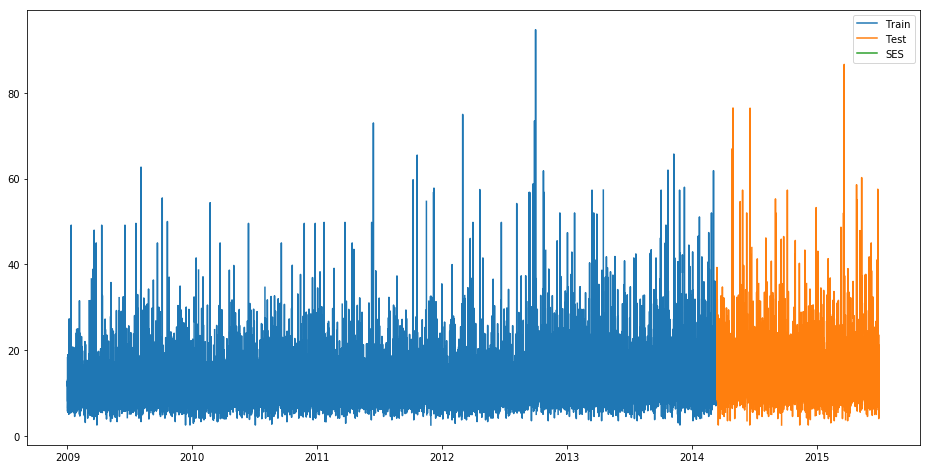

In [446]:
plt.figure(figsize=(16,8))
plt.plot(train['fare_amount'], label='Train')
plt.plot(test['fare_amount'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')